# Importing Necessary Libraries 

In [383]:
#importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

# Loading all the csv files and merging important columns

In [384]:
#loading all of the data by default labels and merging them.
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')



# Merge DataFrames based on raceId, driverId, constructorId

df = pd.merge(results,races[['raceId','year','round','name']],on='raceId',how='left')
df = pd.merge(df,drivers[['driverId','driverRef','nationality']],on = 'driverId', how='left')
df = pd.merge(df,constructors[['constructorId','name','nationality']],on='constructorId',how='left')


In [385]:
#df.info()
#df['year']#which gives your result

# Cleaning, Renaming and Preparing Data

In [386]:
#renaming columns
df.rename(columns={'rank':'fastestLapRank','name_x':'gp_name','nationality_x':'driver_nationality','name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace = True)

#dropping unnecessary columns
df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','raceId','driverId','constructorId'],axis=1,inplace=True)

#rearranging columns
df = df[['year','gp_name','round','driver','constructor_name','grid','positionOrder','points','time','milliseconds','fastestLapRank','fastestLapTime','fastestLapSpeed','driver_nationality','constructor_nationality']]

In [387]:
#dropping 2019 season because it is incomplete
#df = df[df['year']!=2019]

In [388]:
#sorting values
df=df.sort_values(by=['year','round','positionOrder'], ascending=[False,True,True])

In [389]:
# Replace \\N values in time col

df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan, inplace=True)
df.fastestLapRank.replace('\\N',np.nan, inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N',np.nan, inplace=True)

# change datatypes

df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [390]:
#reset index
df.reset_index(drop=True,inplace=True)

# Information And Description About The Prepared Data

In [391]:
#shape
print(df.shape)

#info
df.info()

#head
df.head(10)

(26080, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     26080 non-null  int64  
 1   gp_name                  26080 non-null  object 
 2   round                    26080 non-null  int64  
 3   driver                   26080 non-null  object 
 4   constructor_name         26080 non-null  object 
 5   grid                     26080 non-null  int64  
 6   positionOrder            26080 non-null  int64  
 7   points                   26080 non-null  float64
 8   time                     7251 non-null   object 
 9   milliseconds             7250 non-null   float64
 10  fastestLapRank           7831 non-null   float64
 11  fastestLapTime           7615 non-null   object 
 12  fastestLapSpeed          7615 non-null   float64
 13  driver_nationality       26080 non-null  object 
 14  constructo

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736.0,6.0,1:36.236,202.452,Dutch,Austrian
1,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18.0,+11.987,5648723.0,7.0,1:36.344,202.225,Mexican,Austrian
2,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15.0,+38.637,5675373.0,5.0,1:36.156,202.620,Spanish,British
3,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12.0,+48.052,5684788.0,14.0,1:37.130,200.588,Spanish,Italian
4,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10.0,+50.977,5687713.0,10.0,1:36.546,201.802,British,German
5,2023,Bahrain Grand Prix,1,stroll,Aston Martin,8,6,8.0,+54.502,5691238.0,9.0,1:36.546,201.802,Canadian,British
6,2023,Bahrain Grand Prix,1,russell,Mercedes,6,7,6.0,+55.873,5692609.0,17.0,1:37.221,200.401,British,German
7,2023,Bahrain Grand Prix,1,bottas,Alfa Romeo,12,8,4.0,+1:12.647,5709383.0,18.0,1:37.379,200.075,Finnish,Swiss
8,2023,Bahrain Grand Prix,1,gasly,Alpine F1 Team,20,9,2.0,+1:13.753,5710489.0,2.0,1:35.068,204.939,French,French
9,2023,Bahrain Grand Prix,1,albon,Williams,15,10,1.0,+1:29.774,5726510.0,15.0,1:37.144,200.559,Thai,British


In [392]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

# Top 10 Most Successful Drivers

               driver  positionOrder
0            hamilton            103
1  michael_schumacher             91
2              vettel             53
3               prost             51
4      max_verstappen             45
5               senna             41
6              alonso             32
7             mansell             31
8             stewart             27
9               lauda             25


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


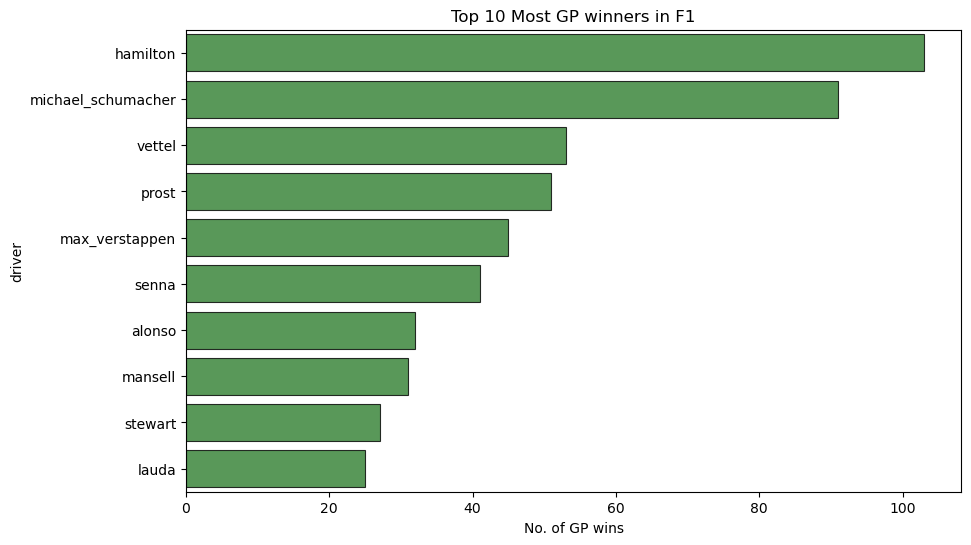

In [393]:
#All the GP winners (drivers)
winner_drivers=df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#GOATS 
top_10_GOATS = winner_drivers.head(10)   #top 10 drivers of all time
print(top_10_GOATS)

#barplot indicating top 10 drivers
sb.barplot(data=top_10_GOATS, y='driver', x= 'positionOrder', color='forestgreen', alpha = 0.8, linewidth = 0.8, edgecolor='black')
plt.title('Top 10 Most GP winners in F1')
plt.ylabel('driver')
plt.xlabel('No. of GP wins')
plt.show()

# Top 10 Most Successful Constructors

  constructor_name  positionOrder
0          Ferrari            243
1          McLaren            179
2         Mercedes            125
3         Williams            114
4         Red Bull            104
5       Team Lotus             45
6          Renault             35
7         Benetton             27
8          Brabham             23
9          Tyrrell             23


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


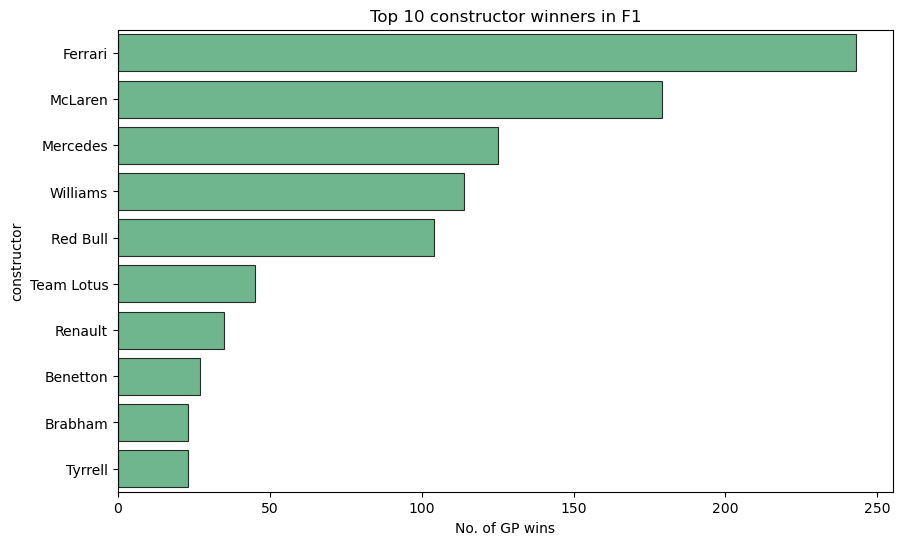

In [394]:
#constructor winners
winner_constructors=df.loc[df['positionOrder']==1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#top 10 constructor winners 
top_10_constructor_winners = winner_constructors.head(10)   #top 10 drivers of all time
print(top_10_constructor_winners)

#barplot indicating top 10 drivers
sb.barplot(data=top_10_constructor_winners, y='constructor_name', x= 'positionOrder', color='mediumseagreen', alpha = 0.8, linewidth = 0.8, edgecolor='black')
plt.title('Top 10 constructor winners in F1')
plt.ylabel('constructor')
plt.xlabel('No. of GP wins')
plt.show()

# Find How The Finishing Position Is Depended On Starting Position

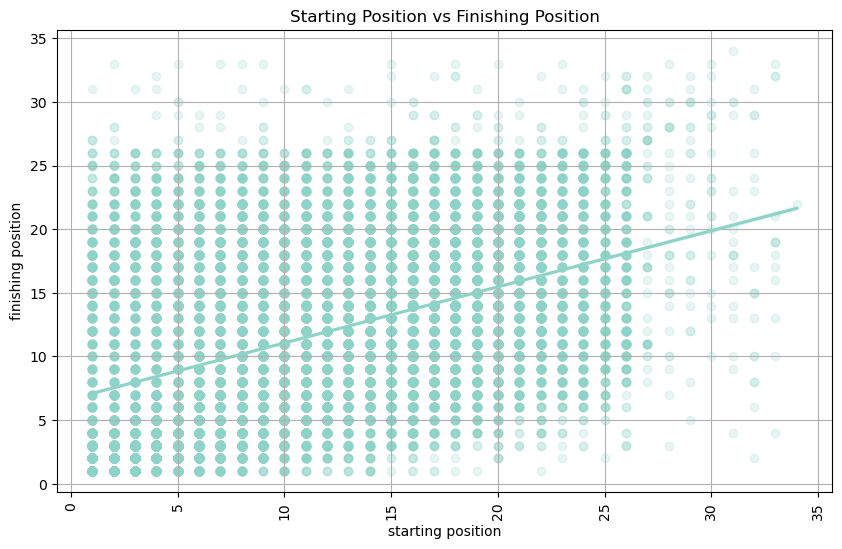

In [395]:
#regression plot showing how starting position and finishing position vary
df_without_pitlane_starting = df[df['grid']!=0]    #excluding pitlane as starting positions

sb.regplot(data=df_without_pitlane_starting, x='grid', y='positionOrder', x_jitter=0.001, y_jitter=0.001,scatter_kws={'alpha':1/5})
plt.title('Starting Position vs Finishing Position')
plt.xlabel('starting position')
plt.xticks(rotation=90)
plt.ylabel('finishing position')
plt.grid()


#we can see they have a linear correlation

# Win From Pole Percentage For Each Grand prix

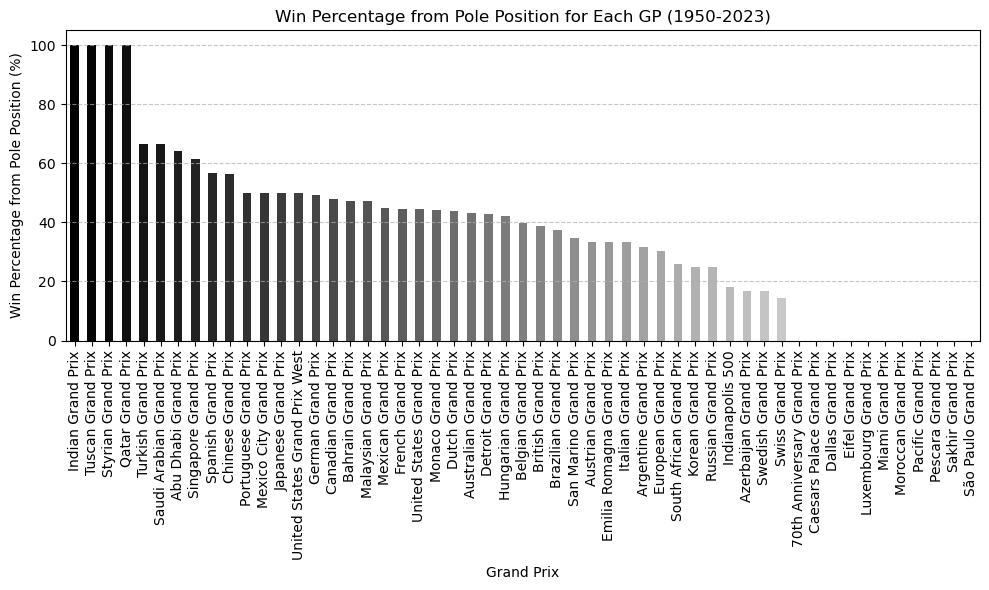

In [396]:
#how important is pole position

# Calculate the total number of races from the pole position for each Grand Prix
total_races_from_pole = df[df['grid'] == 1].groupby('gp_name').size()

# Calculate the total number of wins from the pole position for each Grand Prix
total_wins_from_pole = df[(df['grid'] == 1) & (df['positionOrder'] == 1)].groupby('gp_name').size()

# Calculate the win percentage from the pole position for each Grand Prix
win_from_pole_percentage = (total_wins_from_pole / total_races_from_pole) * 100


# Sort GPs based on win percentage from pole position in descending order
win_from_pole_percentage_sorted = win_from_pole_percentage.sort_values(ascending=False)

# Create a gradient of black colors
n = len(win_from_pole_percentage_sorted)
colors = [(0, 0, 0, i) for i in np.linspace(1, 0, n)]

# Plotting the barplot
plt.figure(figsize=(10, 6))
win_from_pole_percentage_sorted.plot(kind='bar', color=colors)
plt.title('Win Percentage from Pole Position for Each GP (1950-2023)')
plt.xlabel('Grand Prix')
plt.ylabel('Win Percentage from Pole Position (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()

# Change In Speed Of The cars Year 2000 Onwards For Each Grand Prix

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Average speed among all teams during the fastest lap at each gp')

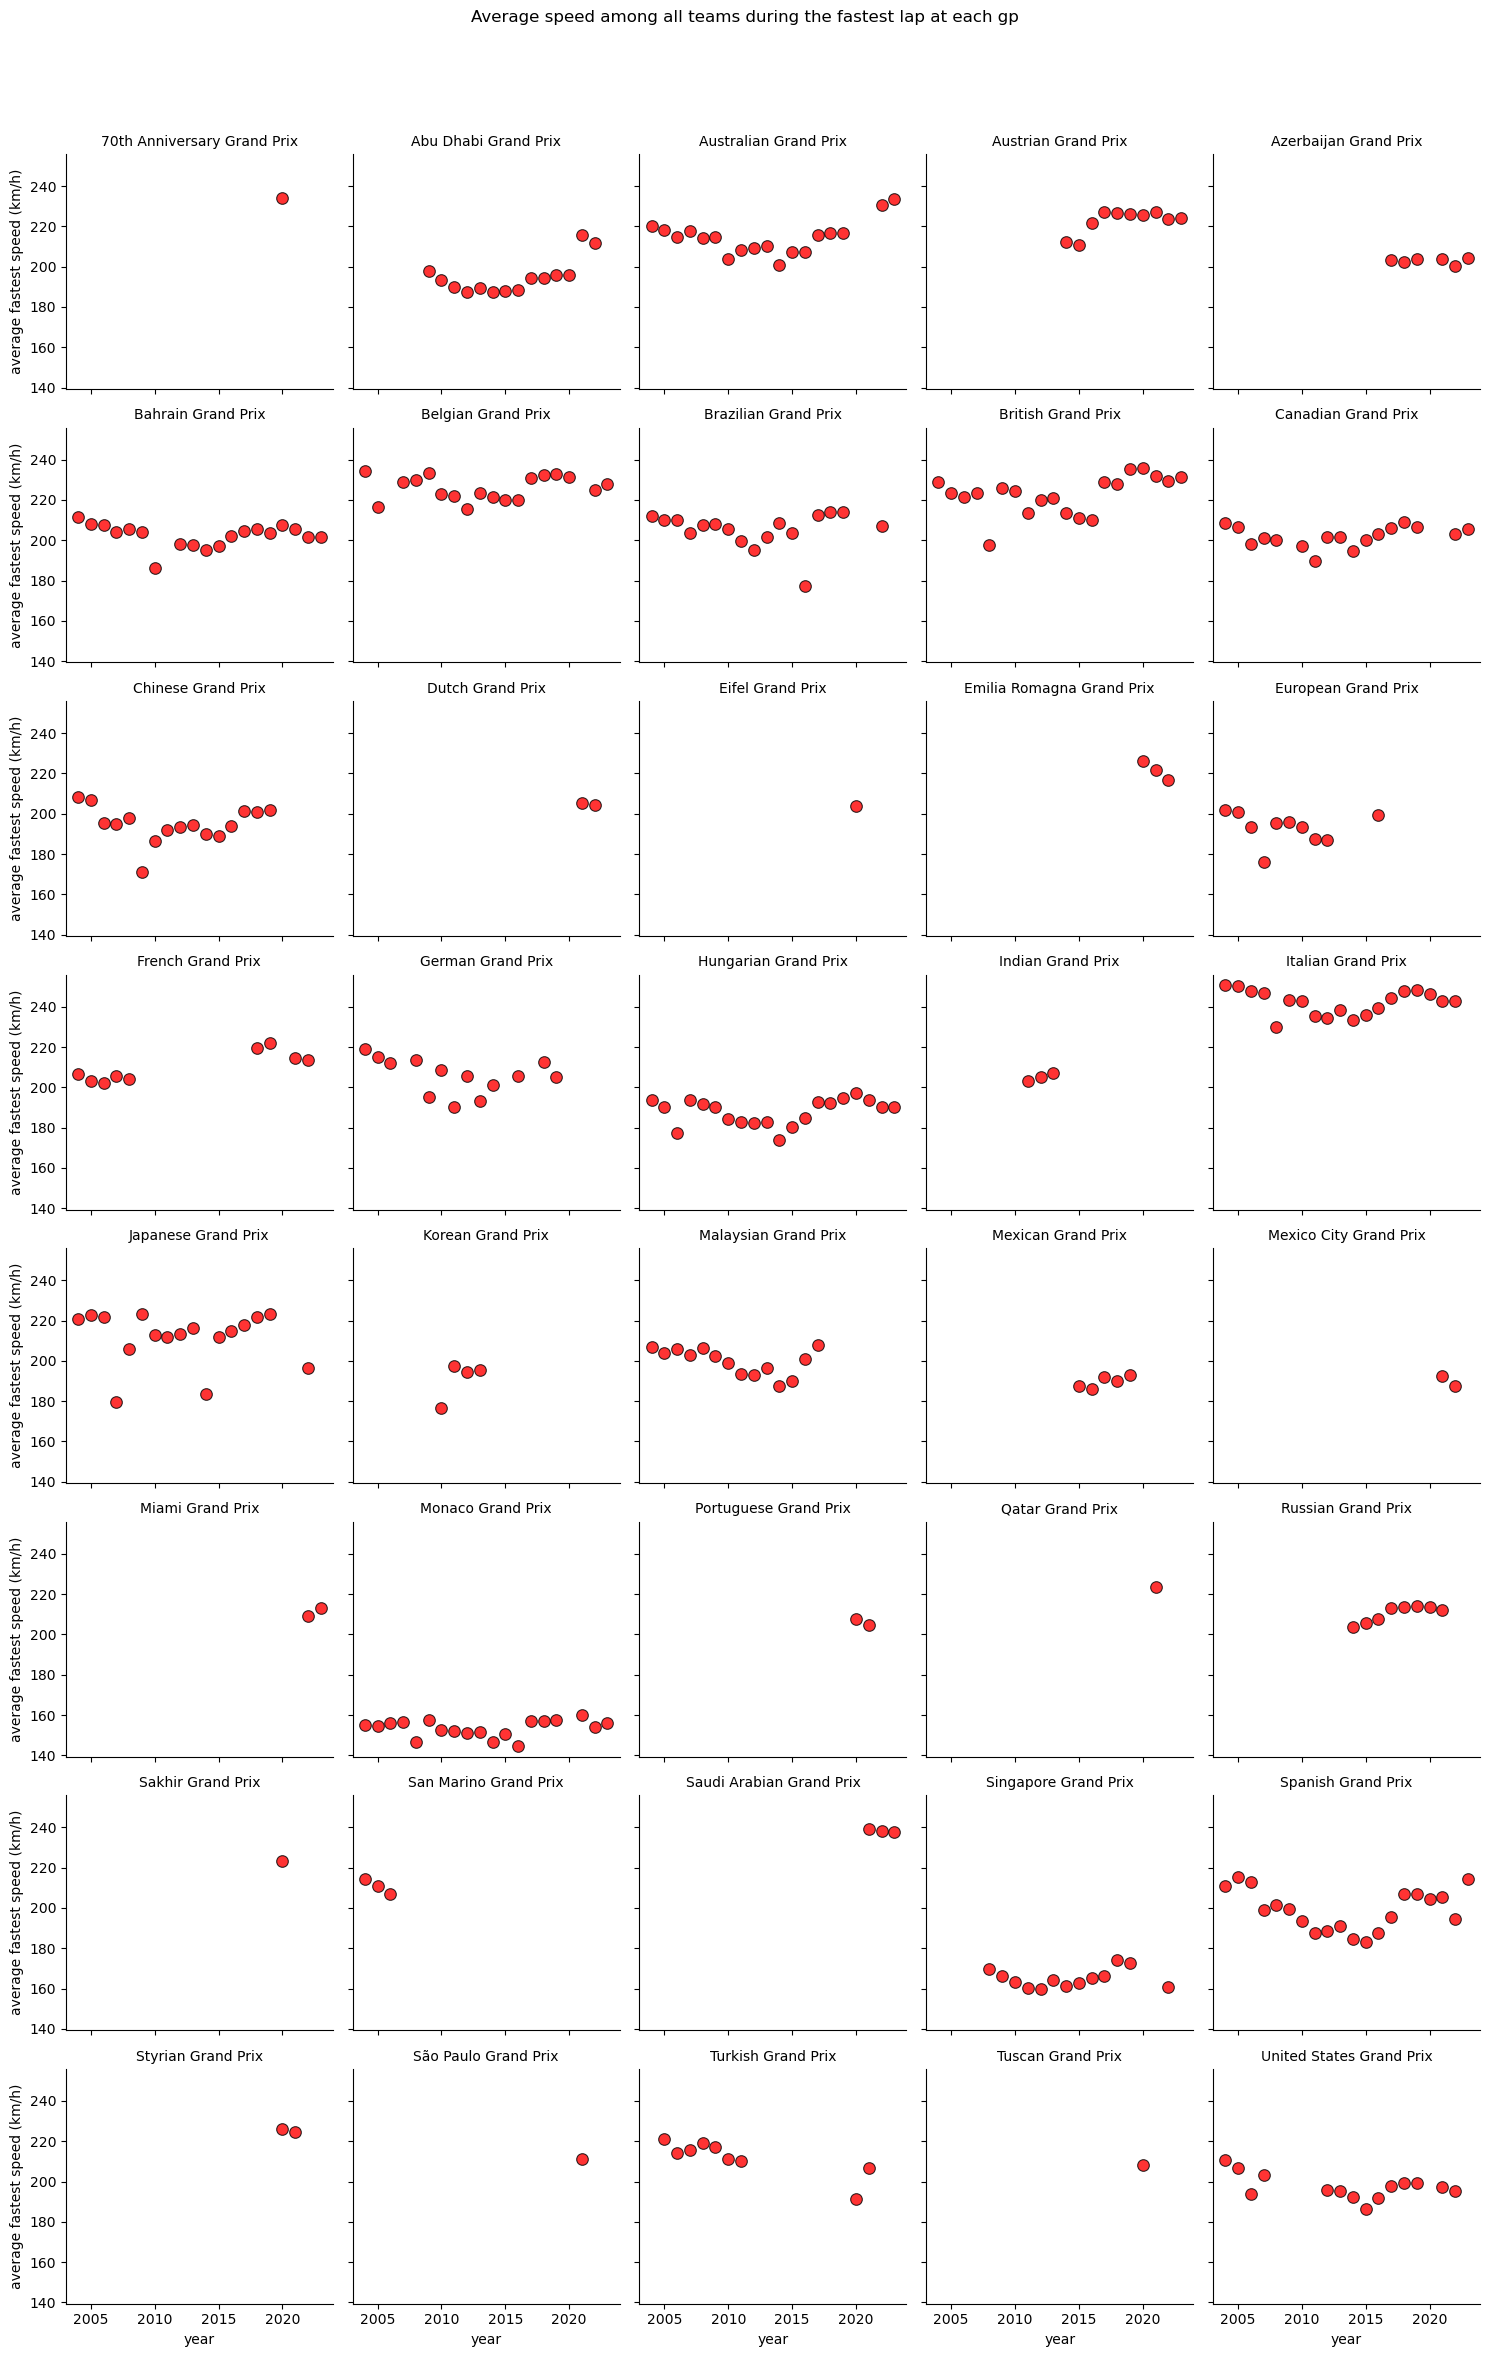

In [397]:
#figure out how the speed in every gp has changed over the course of the years from 2000 onwards

df_speed=df[df['year']>2000]
df_speed_group=df_speed.groupby(['gp_name','year'])['fastestLapSpeed'].mean().to_frame().reset_index()

#creating a facetgrid

g=sb.FacetGrid(data=df_speed_group,col='gp_name', col_wrap=5)
g.map(plt.scatter,'year','fastestLapSpeed',alpha=0.8,linewidth=0.8,edgecolor='black',s=70, color='red')
g.set_titles("{col_name}")
g.set_xlabels('year')
g.set_ylabels('average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed among all teams during the fastest lap at each gp')

# Fastest Grand Prix Circuits

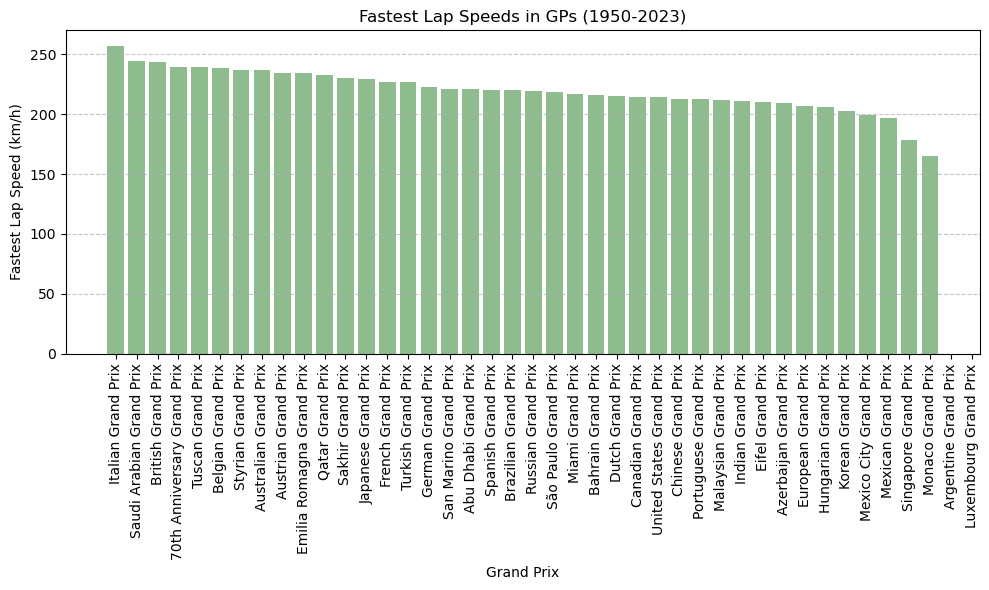

In [398]:
# Sort the DataFrame based on the fastest lap speeds in descending order
df_sorted = df.sort_values(by='fastestLapSpeed', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['gp_name'], df_sorted['fastestLapSpeed'], color='darkseagreen')
plt.title('Fastest Lap Speeds in GPs (1950-2023)')
plt.xlabel('Grand Prix')
plt.ylabel('Fastest Lap Speed (km/h)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()